# Orthogonal Frequency Division Multiplexing

Used in Wi-Fi 802.11ac (and probably more recent versions), 4G/5G, WiMAX, Satellites!

What is OFDM, and why is it better than FDM?

## FDM

FDM is frequency division multiplexing, it is about transmitting data simultaneously through different frequencies in time.

FDM allows users to communicate at the same time by dividing the bandwidth into non-overlapping subchannels.
A guardband, a narrow frequency range is in between to ensure they don't interfere.

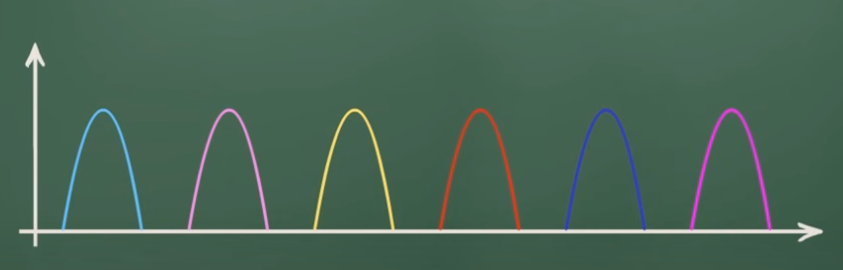

## OFDM

In OFDM, these channels actually overlap! In return, we can utilize way more channels, for more communication.

But then, shouldn't OFDM interfere with one another? No, because these frequencies should be orthogonal, hence the term OFDM.

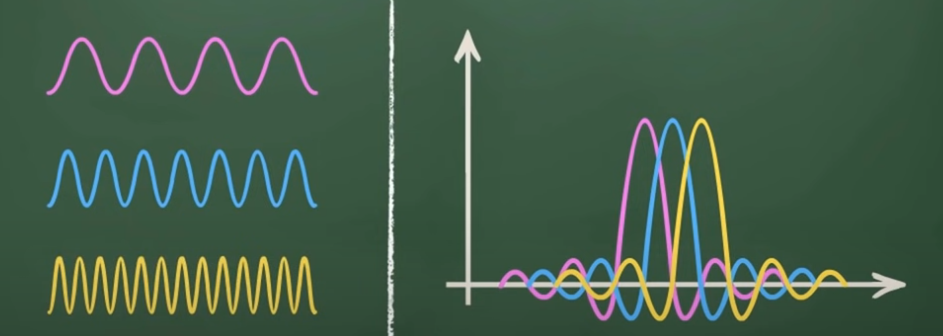

When a signal is at its peak, all other signals must be at 0!

Let's dive into how OFDM would look like in code. We'll do another, simpler code later on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Function to generate OFDM signal with varying parameters
def generate_ofdm(num_subcarriers=64, cyclic_prefix_length=16, num_symbols=10):
    # Generate random BPSK symbols
    data_bits = np.random.randint(0, 2, num_subcarriers * num_symbols)
    modulated_symbols = 1 - 2 * data_bits  # BPSK mapping: 0 -> +1, 1 -> -1
    modulated_symbols = modulated_symbols.reshape((num_symbols, num_subcarriers))
    
    # Perform IFFT to generate OFDM symbols
    time_domain_signals = np.fft.ifft(modulated_symbols, n=num_subcarriers, axis=1)
    
    # Add Cyclic Prefix
    cyclic_prefix = time_domain_signals[:, -cyclic_prefix_length:]
    ofdm_signal_with_cp = np.hstack([cyclic_prefix, time_domain_signals])
    
    # Flatten to simulate a transmitted signal
    transmitted_signal = ofdm_signal_with_cp.flatten()
    
    return modulated_symbols, time_domain_signals, transmitted_signal, cyclic_prefix_length

# Function to visualize the OFDM waveform
def visualize_ofdm(num_subcarriers=64, cyclic_prefix_length=16, num_symbols=10):
    modulated_symbols, time_domain_signals, transmitted_signal, cp_len = generate_ofdm(
        num_subcarriers, cyclic_prefix_length, num_symbols
    )
    
    plt.figure(figsize=(14, 8))
    
    # Plot frequency domain (first OFDM symbol)
    plt.subplot(3, 1, 1)
    plt.stem(np.abs(modulated_symbols[0]))
    plt.title("Frequency Domain (First OFDM Symbol - Subcarriers)")
    plt.xlabel("Subcarrier Index")
    plt.ylabel("Amplitude")
    plt.grid()
    
    # Plot time domain (first OFDM symbol with CP)
    plt.subplot(3, 1, 2)
    plt.plot(np.real(transmitted_signal[:num_subcarriers + cp_len]))
    plt.title("Time Domain (First OFDM Symbol with Cyclic Prefix)")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid()
    
    # Plot a portion of the transmitted signal
    plt.subplot(3, 1, 3)
    plt.plot(np.real(transmitted_signal[: (num_subcarriers + cp_len) * 3]))
    plt.title("Transmitted Signal (First 3 OFDM Symbols)")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# Interactive visualization
interact(visualize_ofdm, 
         num_subcarriers=(8, 128, 8), 
         cyclic_prefix_length=(4, 32, 4), 
         num_symbols=(1, 20, 1));


interactive(children=(IntSlider(value=64, description='num_subcarriers', max=128, min=8, step=8), IntSlider(va…

 ## num_subcarriers (Number of Subcarriers)

Definition: The number of distinct frequency channels used to carry data in OFDM.

* Think of OFDM as splitting the available bandwidth into multiple smaller channels (subcarriers).
* Each subcarrier carries part of the overall data.
* For example: num_subcarriers = 64 means the bandwidth is divided into 64 frequency channels, and we are sending data over these 64 subcarriers simultaneously.

Real-World Context: In 5G, the number of subcarriers can be much larger (e.g., thousands) depending on the bandwidth.


## cyclic_prefix_length (Length of the Cyclic Prefix)
Definition: A portion of the signal (from the end of an OFDM symbol) that is copied and added to the start of the symbol before transmission.

It helps mitigate inter-symbol interference (ISI) caused by multipath propagation in wireless channels.
Why is it important?

* Wireless signals often bounce off objects (e.g., buildings, cars), creating echoes.
* These echoes, called multipath effects, can overlap symbols at the receiver, causing interference.
* Adding a cyclic prefix ensures that the overlap occurs only within the prefix and doesn't affect the actual data.
* In this example: cyclic_prefix_length = 16 means the last 16 samples of the OFDM symbol are appended to the start.

Real-World Context: The cyclic prefix length is typically chosen based on the expected delay spread (the time difference between the first and last received echoes).

## num_symbols (Number of OFDM Symbols)
Definition: The number of OFDM "packets" sent sequentially.

* Each OFDM symbol is a block of modulated subcarriers transmitted in one time interval.
* This parameter defines how many of these blocks we want to send.
* In this example: num_symbols = 10 means we are transmitting 10 OFDM symbols sequentially.

Real-World Context: In practice, this would depend on the duration of the transmission or the amount of data to be sent.


## On Frequency vs. Time Domains

The process so far at the transmitter is:

Data --> Encoding --> Modulation --> Subcarrier Mapping --> IFFT --> Add Cyclic Prefix

Everything before the IFFT is in FREQUENCY DOMAIN. IFFT converts everything to time domain.

After modulation, the modulated symbols are mapped to subcarriers. In any technology, given constraints and all, there is a limited amoung of subcarriers, let's denote them with $N$ for now. In this case, only $N$ modulated symbols can be assigned to subcarriers at a time. These symbols are then forwarded to IFFT; this process creates a time-domain waveform that has a length of $N$ units. 

The CP happens in the time domain. Say the lenght of the CP is $C$. Then, the last $C$ units of the $N$ unit time-domain signal is prepended to the beginning. This is mainly to prevent multi path fading (and there are some other applications as well). Increasing the CP length decreases the system TP, but it may be necessary in adverserial channel conditions. In beamforming, the CP length may be reduced...

Then the final time domain signal is sent over a carrier frequency over to the receiver. 



Emerging alternatives, to be explored:

SC-FDMA

OTFS

FBMC

NOMA